# Reinforcement learning
RL involves an agent interacting with an environment to maximize a reward. Key components:

- State (S): The agent's situation (e.g., position in the grid).
- Action (A): Choices the agent can make (e.g., move up, down, left, right).
- Reward (R): Feedback from the environment (e.g., +1 for reaching the goal).
- Policy (π): The agent's strategy for choosing actions.
- Q-Value: The expected future reward for taking an action in a state.

We'll use Q-Learning, a simple RL algorithm that updates a Q-table based on rewards.

## Define the Grid World Environment
Create a 4x4 grid where the agent starts at (0,0) and aims to reach (3,3). Obstacles or walls can be added, but we’ll keep it simple.

In [5]:
import numpy as np

# Define the grid size
GRID_SIZE = 12

# Initialize the Q-table (states x actions: up, down, left, right)
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))

# Define rewards: +1 at the goal (3,3), 0 elsewhere
rewards = np.zeros((GRID_SIZE, GRID_SIZE))
rewards[3, 3] = 1  # Goal

# Define actions
actions = ['up', 'down', 'left', 'right']
action_to_idx = {a: i for i, a in enumerate(actions)}

# Function to take a step in the environment
def step(state, action):
    row, col = state
    if action == 'up':
        row = max(row - 1, 0)
    elif action == 'down':
        row = min(row + 1, GRID_SIZE - 1)
    elif action == 'left':
        col = max(col - 1, 0)
    elif action == 'right':
        col = min(col + 1, GRID_SIZE - 1)
    
    next_state = (row, col)
    reward = rewards[row, col]
    done = (row == 3 and col == 3)  # Episode ends at goal
    return next_state, reward, done

## Implement Q-Learning

Q-Learning updates the Q-table using the formula:
Q(s, a) = Q(s, a) + α [R + γ * max(Q(s', a')) - Q(s, a)]

- α (alpha): Learning rate.
- γ (gamma): Discount factor for future rewards.
- s': Next state.

In [6]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000

# Training loop
for episode in range(episodes):
    state = (0, 0)  # Start at top-left
    done = False
    
    while not done:
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.choice(actions)  # Explore
        else:
            action_idx = np.argmax(q_table[state[0], state[1]])  # Exploit
            action = actions[action_idx]
        
        # Take a step
        next_state, reward, done = step(state, action)
        
        # Update Q-table
        action_idx = action_to_idx[action]
        old_q = q_table[state[0], state[1], action_idx]
        next_max_q = np.max(q_table[next_state[0], next_state[1]])
        new_q = old_q + alpha * (reward + gamma * next_max_q - old_q)
        q_table[state[0], state[1], action_idx] = new_q
        
        state = next_state

print("Training complete! Q-table:")
print(q_table)

Training complete! Q-table:
[[[0.4964901  0.3850097  0.46644042 0.59049   ]
  [0.55975898 0.39305442 0.51136367 0.6561    ]
  [0.64412566 0.56412245 0.52775087 0.729     ]
  [0.70149801 0.81       0.64767356 0.64330461]
  [0.06157992 0.05812455 0.72897194 0.00589673]
  [0.         0.         0.17765443 0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.50925929 0.         0.05803545 0.04260866]
  [0.5537552  0.         0.09844073 0.        ]
  [0.65604929 0.04035165 0.11577024 0.081     ]
  [0.67068864 0.9        0.55087777 0.49096334]
  [0.65001871 0.02823675 0.1539     0.        ]
  [0.01120534 0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.     

## Test the Learned Policy

Now, let’s see the agent navigate using the trained Q-table:

Learned path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


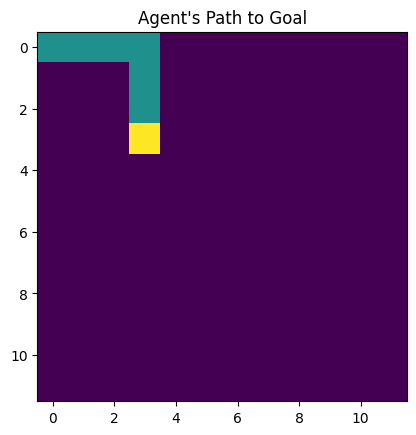

In [7]:
import matplotlib.pyplot as plt

def test_policy():
    state = (0, 0)
    path = [state]
    done = False
    
    while not done:
        action_idx = np.argmax(q_table[state[0], state[1]])
        action = actions[action_idx]
        next_state, reward, done = step(state, action)
        path.append(next_state)
        state = next_state
    
    return path

# Run and visualize
path = test_policy()
print("Learned path:", path)

# Plot the path
grid = np.zeros((GRID_SIZE, GRID_SIZE))
for (row, col) in path:
    grid[row, col] = 1
grid[3, 3] = 2  # Mark the goal

plt.imshow(grid, cmap='viridis')
plt.title("Agent's Path to Goal")
plt.show()